# Unsupervised Machine Learning Models

Modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import vincent as vin
import seaborn as sb

import time

## data

I will actually create a new dataset by user by song. 

In [2]:
#hdf5 metadata
hdf5_data= pd.read_csv('hdf5.csv', sep=',')
len(hdf5_data)

10000

In [3]:
genres = pd.read_table('http://www.ifs.tuwien.ac.at/mir/msd/partitions/msd-MAGD-genreAssignment.cls',sep='\t', header=None)

In [4]:
genres.columns=['track_id','genre_id']

In [5]:
hdf5_w_genre = hdf5_data.merge(genres,on='track_id')

In [6]:
user_behavior = pd.read_table('/Users/juliaengel-dagher/Downloads/train_triplets.txt', sep='\t', names =['user_id','song_id','play_count'])

In [7]:
len(user_behavior)

48373586

In [8]:
user_behavior.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [9]:
df = user_behavior.merge(hdf5_w_genre, on='song_id')

In [10]:
len(df)

393727

In [11]:
df.head()

,user_id,song_id,play_count,Unnamed: 0,artist_familiarty,artist_hotness,artist_id,artist_latitude,artist_location,artist_longitude,...,song_titles,track_id,song_bars,song_beats,song_keys,song_modes,song_tatum,song_tempo,song_time_signatures,genre_id
0,b64cdd1a0bd907e5e00b39e345194768e330d652,SOLXDDC12A6701FBFD,1,6089,0.871011,0.80483,ARTH9041187FB43E1F,NaN,"St. Joseph, MO",NaN,...,I'm Back,TRAUURC128E078EC6E,[ 1.37360000e-01 1.46432000e+00 2.7929300...,[ 1.37360000e-01 4.69100000e-01 8.0084000...,11,0,[ 1.37360000e-01 3.03640000e-01 4.6910000...,180.168,4,Rap
1,951945330eb5df161ac4f97729647514001cd102,SOLXDDC12A6701FBFD,3,6089,0.871011,0.80483,ARTH9041187FB43E1F,NaN,"St. Joseph, MO",NaN,...,I'm Back,TRAUURC128E078EC6E,[ 1.37360000e-01 1.46432000e+00 2.7929300...,[ 1.37360000e-01 4.69100000e-01 8.0084000...,11,0,[ 1.37360000e-01 3.03640000e-01 4.6910000...,180.168,4,Rap
2,bd64f193f0f53f09d44ff48fd52830ff2fded392,SOLXDDC12A6701FBFD,1,6089,0.871011,0.80483,ARTH9041187FB43E1F,NaN,"St. Joseph, MO",NaN,...,I'm Back,TRAUURC128E078EC6E,[ 1.37360000e-01 1.46432000e+00 2.7929300...,[ 1.37360000e-01 4.69100000e-01 8.0084000...,11,0,[ 1.37360000e-01 3.03640000e-01 4.6910000...,180.168,4,Rap
3,e427f647c231c1bde8881eca5b2f5db9b3bcb2b4,SOLXDDC12A6701FBFD,1,6089,0.871011,0.80483,ARTH9041187FB43E1F,NaN,"St. Joseph, MO",NaN,...,I'm Back,TRAUURC128E078EC6E,[ 1.37360000e-01 1.46432000e+00 2.7929300...,[ 1.37360000e-01 4.69100000e-01 8.0084000...,11,0,[ 1.37360000e-01 3.03640000e-01 4.6910000...,180.168,4,Rap
4,02192554db8fe6d17b6309aabb2b7526a2e58534,SOLXDDC12A6701FBFD,1,6089,0.871011,0.80483,ARTH9041187FB43E1F,NaN,"St. Joseph, MO",NaN,...,I'm Back,TRAUURC128E078EC6E,[ 1.37360000e-01 1.46432000e+00 2.7929300...,[ 1.37360000e-01 4.69100000e-01 8.0084000...,11,0,[ 1.37360000e-01 3.03640000e-01 4.6910000...,180.168,4,Rap


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393727 entries, 0 to 393726
Data columns (total 24 columns):
user_id                 393727 non-null object
song_id                 393727 non-null object
play_count              393727 non-null int64
Unnamed: 0              393727 non-null int64
artist_familiarty       393727 non-null float64
artist_hotness          393727 non-null float64
artist_id               393727 non-null object
artist_latitude         175746 non-null float64
artist_location         329387 non-null object
artist_longitude        175746 non-null float64
artist_names            393727 non-null object
song_durations          393727 non-null float64
song_hotness            350523 non-null float64
song_release_years      393727 non-null int64
song_titles             393727 non-null object
track_id                393727 non-null object
song_bars               393727 non-null object
song_beats              393727 non-null object
song_keys               393727 non-null 

In [14]:
df['beats_number'] = [len(x) for x in df.song_beats]
df['bars_number'] = [len(x) for x in df.song_bars]
df['tatum_number'] = [len(x) for x in df.song_tatum]

In [15]:
#delete Unnamed column which was created during merge
df=df.drop(['Unnamed: 0','artist_latitude','artist_location','artist_longitude','song_bars','song_beats','song_tatum'],1)

In [16]:
#substitute all NaN with 0
df = df.fillna(0)

Now let's add a rating system based on play count - so the more often the user listened to the song, the higher it was rated. Let's create a simple rating system 1-5. 

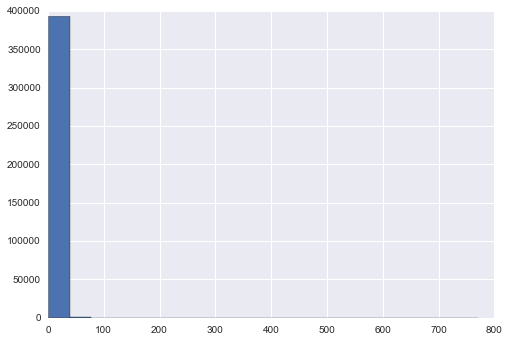

In [17]:
f = df.play_count.hist(bins=20)

In [18]:
df.play_count.describe()

count    393727.000000
mean          2.567627
std           4.822111
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         771.000000
Name: play_count, dtype: float64

Not very evenly distributed. 50% of the songs were listened to only once by a user. We will give htis a rating of 1 - the person didn't like it, but listened to it (vs. 0 not listening to it at all.)

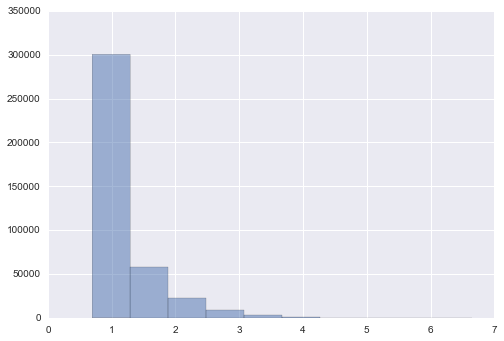

In [19]:
np.log(df.play_count+1).hist(alpha=.5)

In [20]:
df.play_count.value_counts()

1      238951
2       61504
3       27170
5       15592
4       15350
6        7464
7        5225
8        3767
10       2962
9        2769
11       1875
12       1526
13       1216
15        989
14        946
16        721
17        685
18        483
19        443
20        438
21        363
22        286
24        237
25        236
23        234
27        170
26        165
28        141
29        141
30        135
        ...  
204         1
202         1
179         1
174         1
171         1
166         1
160         1
156         1
154         1
152         1
145         1
143         1
142         1
133         1
86          1
132         1
380         1
123         1
120         1
118         1
372         1
116         1
115         1
110         1
106         1
104         1
92          1
88          1
87          1
256         1
Name: play_count, dtype: int64

In [21]:
pd.value_counts(pd.cut(df.play_count, bins = 10))

(0.23, 78]    393576
(78, 155]        129
(155, 232]        13
(232, 309]         6
(309, 386]         2
(694, 771]         1
(617, 694]         0
(540, 617]         0
(463, 540]         0
(386, 463]         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e09a3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11256f290>]], dtype=object)

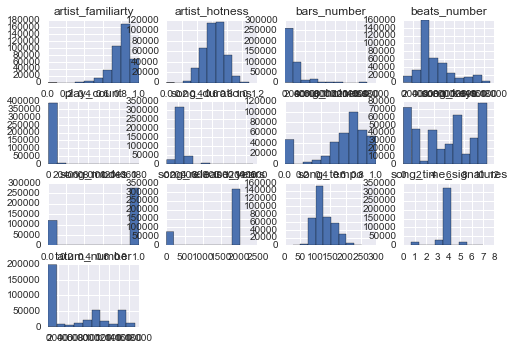

In [22]:
df[df['play_count'] < 200].hist()

In [23]:
bins = [1,2,10,20,40, np.inf]

In [24]:
df['rating']= pd.cut(df['play_count'], bins=bins, include_lowest=True, labels=[1,2,3,4,5]).astype(int)

In [25]:
df.head()

,user_id,song_id,play_count,artist_familiarty,artist_hotness,artist_id,artist_names,song_durations,song_hotness,song_release_years,...,track_id,song_keys,song_modes,song_tempo,song_time_signatures,genre_id,beats_number,bars_number,tatum_number,rating
0,b64cdd1a0bd907e5e00b39e345194768e330d652,SOLXDDC12A6701FBFD,1,0.871011,0.80483,ARTH9041187FB43E1F,Eminem,312.2673,0.811708,2000,...,TRAUURC128E078EC6E,11,0,180.168,4,Rap,16077,4002,109,1
1,951945330eb5df161ac4f97729647514001cd102,SOLXDDC12A6701FBFD,3,0.871011,0.80483,ARTH9041187FB43E1F,Eminem,312.2673,0.811708,2000,...,TRAUURC128E078EC6E,11,0,180.168,4,Rap,16077,4002,109,2
2,bd64f193f0f53f09d44ff48fd52830ff2fded392,SOLXDDC12A6701FBFD,1,0.871011,0.80483,ARTH9041187FB43E1F,Eminem,312.2673,0.811708,2000,...,TRAUURC128E078EC6E,11,0,180.168,4,Rap,16077,4002,109,1
3,e427f647c231c1bde8881eca5b2f5db9b3bcb2b4,SOLXDDC12A6701FBFD,1,0.871011,0.80483,ARTH9041187FB43E1F,Eminem,312.2673,0.811708,2000,...,TRAUURC128E078EC6E,11,0,180.168,4,Rap,16077,4002,109,1
4,02192554db8fe6d17b6309aabb2b7526a2e58534,SOLXDDC12A6701FBFD,1,0.871011,0.80483,ARTH9041187FB43E1F,Eminem,312.2673,0.811708,2000,...,TRAUURC128E078EC6E,11,0,180.168,4,Rap,16077,4002,109,1


In [26]:
for col in df:
    print "%-20s: %7d uniques" % (col, df[col].nunique())

user_id             :  266346 uniques
song_id             :    1780 uniques
play_count          :     150 uniques
artist_familiarty   :    1089 uniques
artist_hotness      :    1075 uniques
artist_id           :    1066 uniques
artist_names        :    1067 uniques
song_durations      :    1642 uniques
song_hotness        :     876 uniques
song_release_years  :      51 uniques
song_titles         :    1767 uniques
track_id            :    1780 uniques
song_keys           :      12 uniques
song_modes          :       2 uniques
song_tempo          :    1753 uniques
song_time_signatures:       6 uniques
genre_id            :      20 uniques
beats_number        :    1416 uniques
bars_number         :    1071 uniques
tatum_number        :     734 uniques
rating              :       5 uniques


In [27]:
#add rating index
df['index'] = range(1, len(df) + 1)

In [28]:
print "We have %d ratings for %d songs from %d genres, by %d listeneres" % \
    (len(df), df.song_id.nunique(), df.genre_id.nunique(), df.user_id.nunique())

We have 393727 ratings for 1780 songs from 20 genres, by 266346 listeneres


In [29]:
#creating an index to look up song information
song_names = df.groupby('song_id').song_titles.first()

In [30]:
song_df=df.groupby('song_id')['song_titles','artist_names'].first()

In [31]:
song_df.head()

,song_titles,artist_names
song_id,,
SOAAEHR12A6D4FB060,Slaves & Bulldozers,Soundgarden
SOAAFUV12AB018831D,Where Do The Children Play? (LP Version),Big Mountain
SOABLAF12AB018E1D9,Lesson Learned,Alice In Chains
SOABVPU12AB018AA22,Conquer Me,Delroy Wilson
SOACEDS12A6701EAAA,Gone To The Movies,Semisonic


In [32]:
df.rating.value_counts().sort_index()

1    300455
2     80299
3      9322
4      2866
5       785
Name: rating, dtype: int64

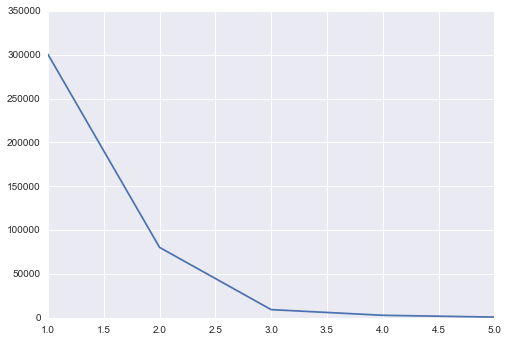

In [33]:
df.rating.value_counts().sort_index().plot()

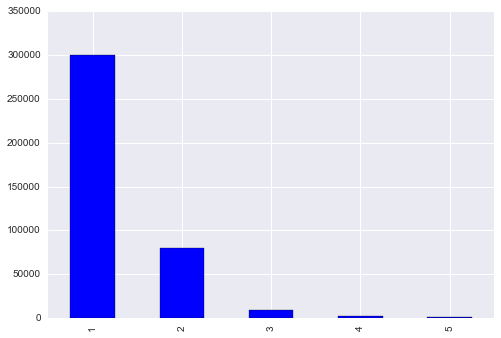

In [34]:
df.rating.value_counts().sort_index().plot(kind='bar')

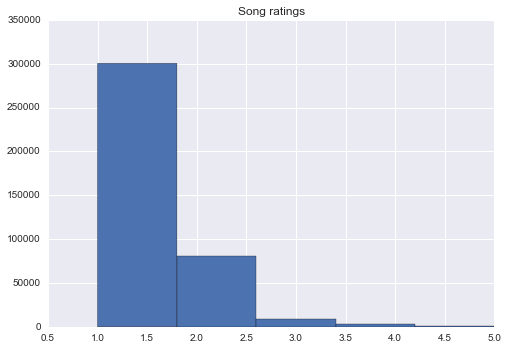

In [35]:
f = df.rating.hist(bins=5)
f = plt.title("Song ratings")

In [36]:
df.rating.value_counts().sort_index()

1    300455
2     80299
3      9322
4      2866
5       785
Name: rating, dtype: int64

In [37]:
df.genre_id.value_counts().sort_index()

Avant_Garde           18
Blues               1067
Children             165
Classical            414
Comedy_Spoken        493
Country             9121
Easy_Listening        59
Electronic         12956
Folk                 766
International       1048
Jazz                2170
Latin              11239
New Age              825
Pop_Rock          274827
Rap                47429
Reggae             18085
Religious           2576
RnB                 8917
Stage                190
Vocal               1362
Name: genre_id, dtype: int64

## Feature Matrix

For unsupervised learning we are going to create a feature matrix.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393727 entries, 0 to 393726
Data columns (total 22 columns):
user_id                 393727 non-null object
song_id                 393727 non-null object
play_count              393727 non-null int64
artist_familiarty       393727 non-null float64
artist_hotness          393727 non-null float64
artist_id               393727 non-null object
artist_names            393727 non-null object
song_durations          393727 non-null float64
song_hotness            393727 non-null float64
song_release_years      393727 non-null int64
song_titles             393727 non-null object
track_id                393727 non-null object
song_keys               393727 non-null int64
song_modes              393727 non-null int64
song_tempo              393727 non-null float64
song_time_signatures    393727 non-null int64
genre_id                393727 non-null object
beats_number            393727 non-null int64
bars_number             393727 non-null int6

The class **DictVectorizer** can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/SciPy representation used by scikit-learn estimators

In [39]:
#first we nee to vectorixe genre_id
from sklearn.feature_extraction import DictVectorizer

categorical_features = df[['genre_id']]
dv = DictVectorizer()
cat_matrix = dv.fit_transform(categorical_features.T.to_dict().values())

Convert numerical values to strings, so patsy will treat them as categorical features

In [ ]:
#from homework
#data['beer_abv_cat'] = abv.dropna().astype(int).astype(str)
#data['brewery_id_str'] = data.brewery_id.astype(str)
#X_abv_brew = dmatrix('beer_abv_cat + brewery_id_str', data=data.fillna(0), return_type='dataframe')
#X_abv_brew.shape

In [ ]:
#X_abv_brew.head()

**CountVectorizer** implements both tokenization and occurrence counting in a single class

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features=max_features)
#X_genre = cv.fit_transform(data.genre_id)

In [40]:
categorical_features.head()

,genre_id
0,Rap
1,Rap
2,Rap
3,Rap
4,Rap


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393727 entries, 0 to 393726
Data columns (total 22 columns):
user_id                 393727 non-null object
song_id                 393727 non-null object
play_count              393727 non-null int64
artist_familiarty       393727 non-null float64
artist_hotness          393727 non-null float64
artist_id               393727 non-null object
artist_names            393727 non-null object
song_durations          393727 non-null float64
song_hotness            393727 non-null float64
song_release_years      393727 non-null int64
song_titles             393727 non-null object
track_id                393727 non-null object
song_keys               393727 non-null int64
song_modes              393727 non-null int64
song_tempo              393727 non-null float64
song_time_signatures    393727 non-null int64
genre_id                393727 non-null object
beats_number            393727 non-null int64
bars_number             393727 non-null int6

In [42]:
from scipy.sparse import hstack
other_features = df[['artist_familiarty','artist_hotness','song_modes','song_time_signatures',\
                       'song_durations','song_tempo','beats_number','song_release_years']]

In [43]:
other_features.head()

,artist_familiarty,artist_hotness,song_modes,song_time_signatures,song_durations,song_tempo,beats_number,song_release_years
0,0.871011,0.80483,0,4,312.2673,180.168,16077,2000
1,0.871011,0.80483,0,4,312.2673,180.168,16077,2000
2,0.871011,0.80483,0,4,312.2673,180.168,16077,2000
3,0.871011,0.80483,0,4,312.2673,180.168,16077,2000
4,0.871011,0.80483,0,4,312.2673,180.168,16077,2000


In [44]:
data_matrix = hstack([cat_matrix, other_features])
data_matrix

<393727x28 sparse matrix of type '<type 'numpy.float64'>'
	with 3346923 stored elements in COOrdinate format>

In [45]:
from sklearn.preprocessing import scale

data_matrix = scale(data_matrix.todense())

## Content Filtering

In this approach we create a feature space, where we map the data to compare listeners to songs. 
Each song gets a representation in the space and each listener gets a listener profile.

## Collaborative Filtering

It seems this is the way to go to recommend a song. 

http://benanne.github.io/2014/08/05/spotify-cnns.html

### Item-based collaborative filtering

### model-based collaborative filtering

## K-means

In [46]:
from sklearn.cluster import KMeans

clustering_model = KMeans(n_clusters = 25)
clustering_model.fit(data_matrix)

clusters = clustering_model.predict(data_matrix)

clusters

array([19, 19, 19, ..., 24, 24, 14], dtype=int32)

In [47]:
pd.Series(clusters).value_counts()

0     73446
22    57302
15    51203
19    45790
3     44168
24    37784
2     18085
7     12956
23    12563
4     11239
1      9121
11     8917
5      2576
10     2170
6      1362
17     1067
8      1048
14      825
12      766
9       493
16      414
20      190
13      165
18       59
21       18
dtype: int64

In [49]:
df['genre_id'].value_counts()

Pop_Rock          274827
Rap                47429
Reggae             18085
Electronic         12956
Latin              11239
Country             9121
RnB                 8917
Religious           2576
Jazz                2170
Vocal               1362
Blues               1067
International       1048
New Age              825
Folk                 766
Comedy_Spoken        493
Classical            414
Stage                190
Children             165
Easy_Listening        59
Avant_Garde           18
Name: genre_id, dtype: int64

In [50]:
results = pd.DataFrame({ 'cluster' : clusters, 'genre_id' : df['genre_id']})
cluster_counts = results.groupby('cluster')['genre_id'].value_counts()

In [51]:
results

,cluster,genre_id
0,19,Rap
1,19,Rap
2,19,Rap
3,19,Rap
4,19,Rap
5,19,Rap
6,19,Rap
7,19,Rap
8,19,Rap
9,19,Rap


In [52]:
cluster_counts

cluster  genre_id      
0        Pop_Rock          73446
1        Country            9121
2        Reggae            18085
3        Rap               44168
4        Latin             11239
5        Religious          2576
6        Vocal              1362
7        Electronic        12956
8        International      1048
9        Comedy_Spoken       493
10       Jazz               2170
11       RnB                8917
12       Folk                766
13       Children            165
14       New Age             825
15       Pop_Rock          51203
16       Classical           414
17       Blues              1067
18       Easy_Listening       59
19       Pop_Rock          43420
         Rap                2370
20       Stage               190
21       Avant_Garde          18
22       Pop_Rock          57302
23       Pop_Rock          11697
         Rap                 866
24       Pop_Rock          37759
         Rap                  25
dtype: int64

In [53]:
for i in xrange(len(cluster_counts)):
    print "Cluster " ,i
    print cluster_counts[i]
    print

Cluster  0
genre_id
Pop_Rock    73446
dtype: int64

Cluster  1
genre_id
Country    9121
dtype: int64

Cluster  2
genre_id
Reggae    18085
dtype: int64

Cluster  3
genre_id
Rap    44168
dtype: int64

Cluster  4
genre_id
Latin    11239
dtype: int64

Cluster  5
genre_id
Religious    2576
dtype: int64

Cluster  6
genre_id
Vocal    1362
dtype: int64

Cluster  7
genre_id
Electronic    12956
dtype: int64

Cluster  8
genre_id
International    1048
dtype: int64

Cluster  9
genre_id
Comedy_Spoken    493
dtype: int64

Cluster  10
genre_id
Jazz    2170
dtype: int64

Cluster  11
genre_id
RnB    8917
dtype: int64

Cluster  12
genre_id
Folk    766
dtype: int64

Cluster  13
genre_id
Children    165
dtype: int64

Cluster  14
genre_id
New Age    825
dtype: int64

Cluster  15
genre_id
Pop_Rock    51203
dtype: int64

Cluster  16
genre_id
Classical    414
dtype: int64

Cluster  17
genre_id
Blues    1067
dtype: int64

Cluster  18
genre_id
Easy_Listening    59
dtype: int64

Cluster  19
genre_id
Pop_Rock    4